# Import Libraries

In [76]:
# import libraries
import os,sys

# Get 
current_dir=os.getcwd()
print(current_dir)

#Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)

#Insert the path to the parent directory
sys.path.insert(0,parent_dir)

c:\Users\CBE\Desktop\week 11\project_week_11\scripts
c:\Users\CBE\Desktop\week 11\project_week_11


In [77]:
#import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import pandas as pd

#import functions/class
from scripts.load_data import read_csv_file
from scripts.dataload import get_financial_data
from scripts.plot import plot_closing_prices,calculate_daily_returns,plot_daily_returns,calculate_daily_percentage_change,plot_percentage_change,calculate_rolling_stats,plot_rolling_stats
from scripts.plot import decompose_time_series
from scripts.ARIMA import arima_model,evaluate_arima

# Upload Data

In [123]:
# Define tickers and date range
tickers = ['BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

# Retrieve financial data
data1 = get_financial_data(tickers, start_date, end_date)
data1.head(5)

[*********************100%***********************]  2 of 2 completed


Price           Close                   High                    Low  \
Ticker            BND         SPY        BND         SPY        BND   
Date                                                                  
2015-01-02  62.387089  172.592865  62.417283  173.811099  62.213474   
2015-01-05  62.568245  169.475922  62.590889  171.702325  62.424825   
2015-01-06  62.749420  167.879639  62.938129  170.316081  62.673938   
2015-01-07  62.787132  169.971603  62.862615  170.316070  62.689006   
2015-01-08  62.688992  172.987747  62.734280  173.206195  62.628603   

Price                        Open               Volume             
Ticker             SPY        BND         SPY      BND        SPY  
Date                                                               
2015-01-02  171.542672  62.221024  173.391022  2218800  121465900  
2015-01-05  169.165069  62.455019  171.534297  5820100  169632600  
2015-01-06  167.073085  62.673938  169.786780  3887600  209151400  
2015-01-07  168.770189  62.756938  169.223867  2433400  125346700  
2015-01-08  171.383062  62.734280  171.399856  1873400  147217800

In [124]:
# Load the dataset
os.chdir('../scripts')
file_path1='../data/TSLA_historical_data.csv'
TS_data=read_csv_file(file_path1)
TS_data.head(5)

Dataset loaded successfully from ../data/TSLA_historical_data.csv


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,02/01/2015,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,0,0
1,05/01/2015,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,0,0
2,06/01/2015,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,0,0
3,07/01/2015,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,0,0
4,08/01/2015,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,0,0


In [125]:
data=pd.concat([data1, TS_data], axis=0)

In [126]:
# Define tickers and date range
tickers = ['TSLA','BND', 'SPY']
start_date = '2015-01-01'
end_date = '2025-01-31'

# Retrieve financial data
yf_data = get_financial_data(tickers, start_date, end_date)
yf_data.head(5)

[*********************100%***********************]  3 of 3 completed


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.387089  172.592865  14.620667  62.417283  173.811099   
2015-01-05  62.568245  169.475922  14.006000  62.590889  171.702325   
2015-01-06  62.749420  167.879639  14.085333  62.938129  170.316081   
2015-01-07  62.787132  169.971603  14.063333  62.862615  170.316070   
2015-01-08  62.688992  172.987747  14.041333  62.734280  173.206195   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.213474  171.542672  14.217333  62.221024   
2015-01-05  14.433333  62.424825  169.165069  13.810667  62.455019   
2015-01-06  14.280000  62.673938  167.073085  13.614000  62.673938   
2015-01-07  14.318667  62.689006  168.770189  13.985333  62.756938   
2015-01-08  14.253333  62.628603  171.383062  14.000667  62.734280   

Price                               Volume                       
Ticker             SPY       TSLA      BND        SPY      TSLA  
Date                                                             
2015-01-02  173.391022  14.858000  2218800  121465900  71466000  
2015-01-05  171.534297  14.303333  5820100  169632600  80527500  
2015-01-06  169.786780  14.004000  3887600  209151400  93928500  
2015-01-07  169.223867  14.223333  2433400  125346700  44526000  
2015-01-08  171.399856  14.187333  1873400  147217800  51637500

# Preprocessing

In [127]:
yf_data.describe()

Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean      69.083444   316.067402   117.848209    69.184951   317.725660   
std        4.777898   117.926910   116.508288     4.786137   118.486410   
min       61.676949   156.800858     9.578000    61.753223   157.864151   
25%       65.370338   214.841980    17.228000    65.435059   215.702215   
50%       68.125961   277.117889    30.298000    68.254344   277.919580   
75%       72.663250   405.869186   221.525002    72.729563   409.134325   
max       78.588928   609.750000   479.859985    78.685538   610.780029   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean     120.474827    68.980312   314.157889   115.097514    69.087206   
std      119.236025     4.767924   117.269902   113.698930     4.778949   
min       10.331333    61.638823   154.676971     9.403333    61.707452   
25%       17.527667    65.280797   214.206938    16.942000    65.357829   
50%       32.329334    67.967070   276.073642    29.760000    68.107128   
75%      226.696671    72.512557   402.830902   217.061661    72.629125   
max      488.540009    78.553796   606.799988   457.510010    78.650412   

Price                                   Volume                              
Ticker          SPY         TSLA           BND           SPY          TSLA  
count   2535.000000  2535.000000  2.535000e+03  2.535000e+03  2.535000e+03  
mean     316.021384   117.877662  4.233200e+06  8.714655e+07  1.120308e+08  
std      117.921618   116.611575  2.796083e+06  4.487253e+07  7.387509e+07  
min      156.354958     9.488000  0.000000e+00  2.027000e+07  1.062000e+07  
25%      214.972508    17.259334  2.057700e+06  5.862005e+07  6.680295e+07  
50%      277.230781    31.299999  3.805800e+06  7.642870e+07  9.264180e+07  
75%      406.100271   222.653336  5.626700e+06  1.018866e+08  1.294283e+08  
max      609.809998   475.899994  3.193720e+07  5.072443e+08  9.140820e+08

In [128]:
yf_data.dtypes

Price   Ticker
Close   BND       float64
        SPY       float64
        TSLA      float64
High    BND       float64
        SPY       float64
        TSLA      float64
Low     BND       float64
        SPY       float64
        TSLA      float64
Open    BND       float64
        SPY       float64
        TSLA      float64
Volume  BND         int64
        SPY         int64
        TSLA        int64
dtype: object

In [129]:
yf_data.isnull().sum()

Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_closing_prices(data, title="Closing Prices Over Time"):
    plt.figure(figsize=(12, 6))
    
    # Adjust column names to match your dataset
    sns.lineplot(x=data.index, y=data["Closing Price"], marker="o")  
    
    plt.title(title, fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

In [133]:
plot_closing_prices(yf_data)

KeyError: 'Closing Price'

<Figure size 1200x600 with 0 Axes>

In [132]:
yf_data.columns = ['_'.join(col).strip() for col in yf_data.columns]

In [102]:
yf_data.columns

Index(['Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY',
       'High_TSLA', 'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY',
       'Open_TSLA', 'Volume_BND', 'Volume_SPY', 'Volume_TSLA'],
      dtype='object')

In [101]:
sns.lineplot(x=yf_data.index, y=yf_data["Price_Close_SPY"], marker="o")

KeyError: 'Price_Close_SPY'

In [97]:
plot_closing_prices(yf_data, " Closing Prices Over Time")

KeyError: 'Closing Price'

<Figure size 1200x600 with 0 Axes>

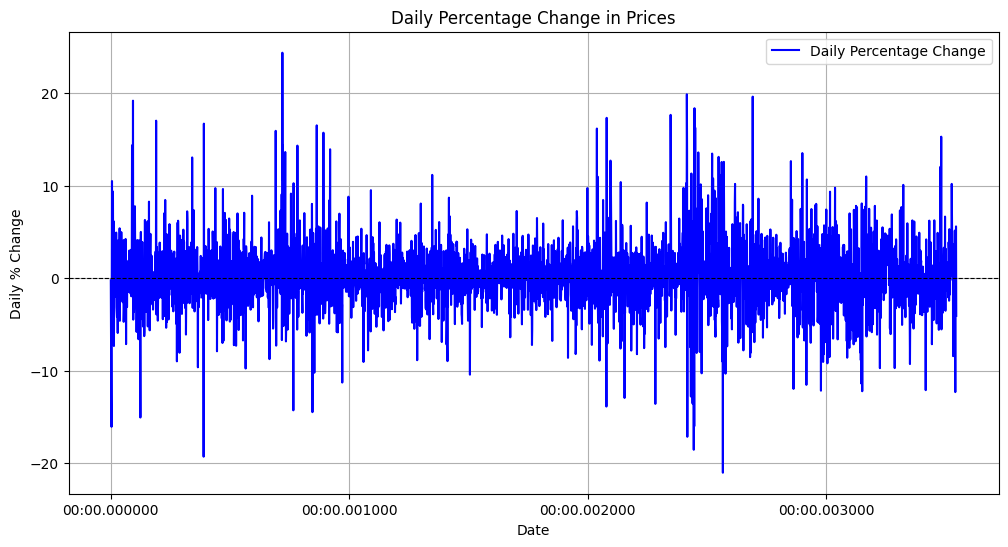

In [72]:
calculate_daily_percentage_change(data)
plot_percentage_change(data)

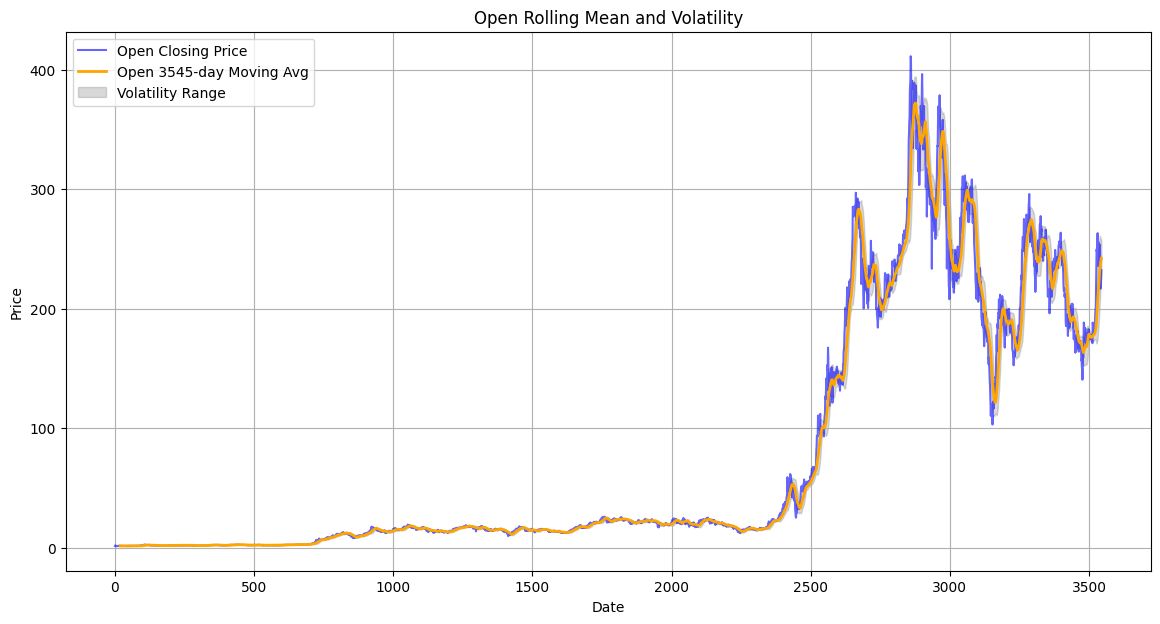

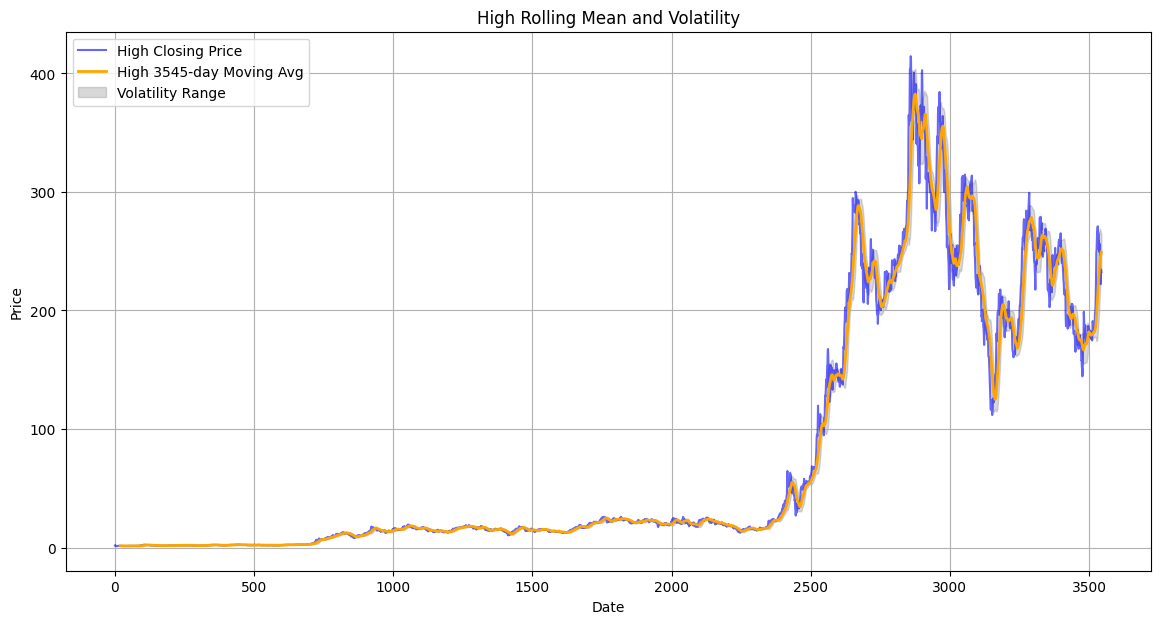

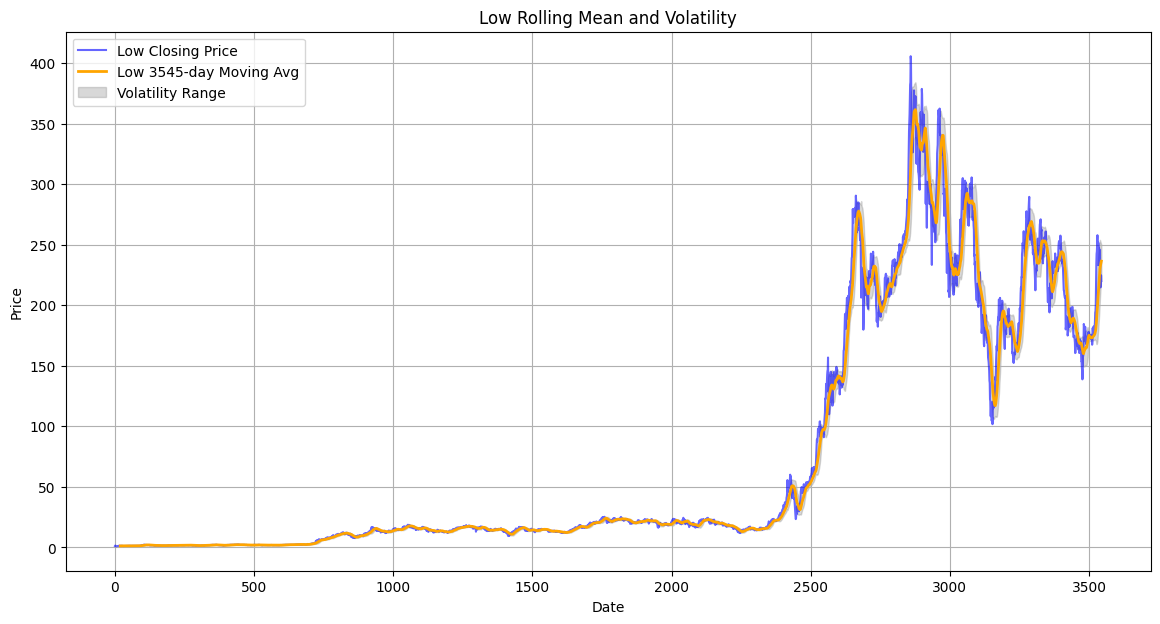

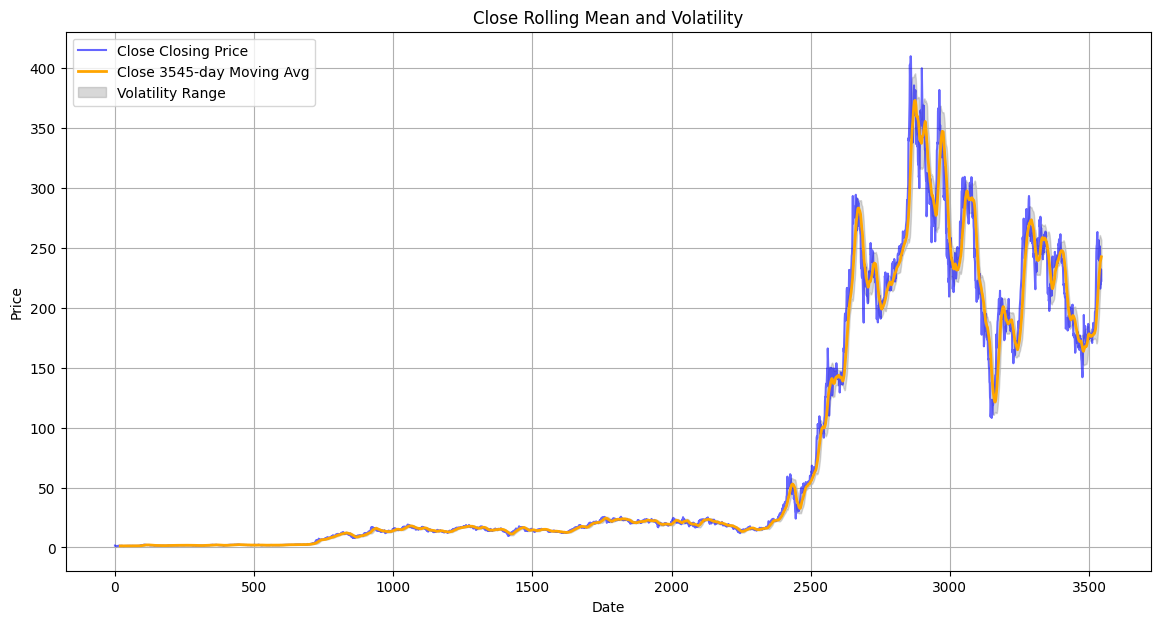

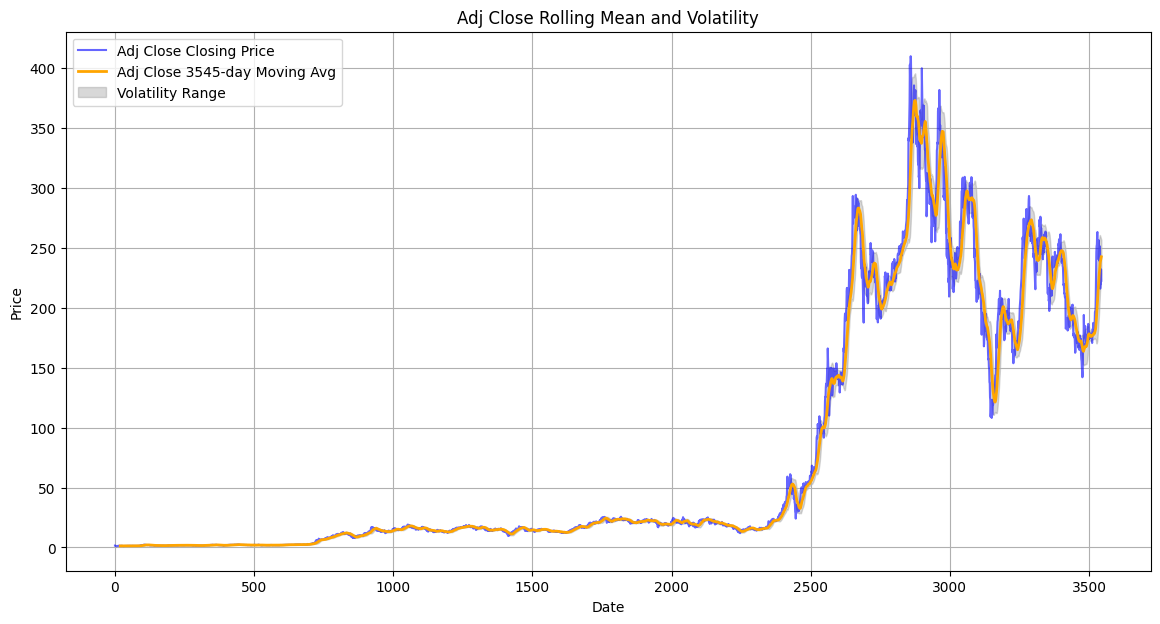

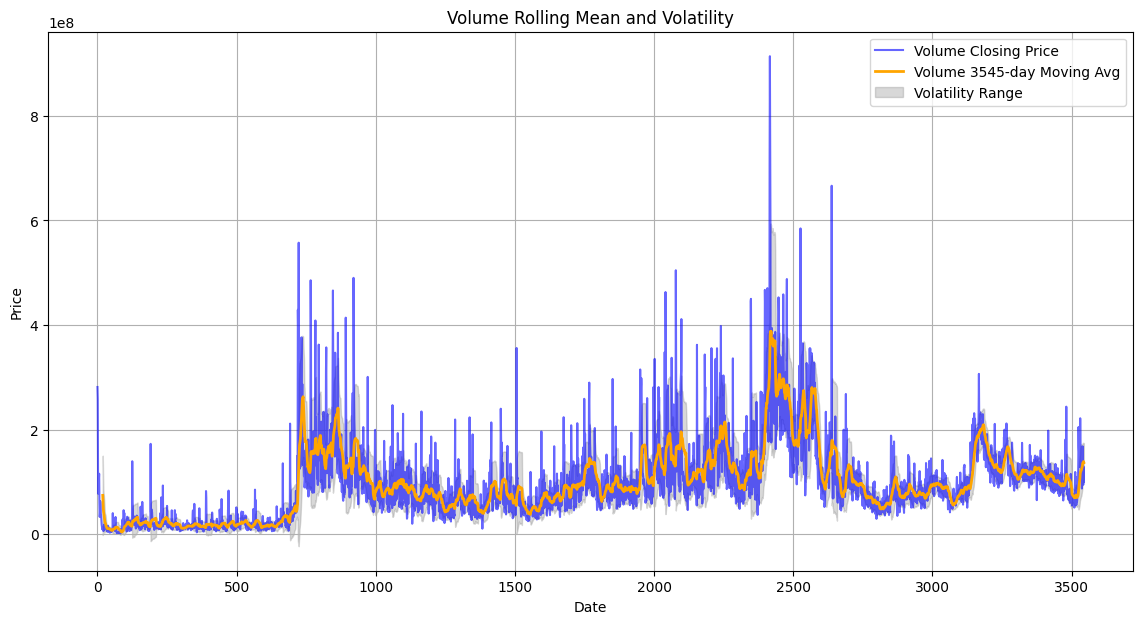

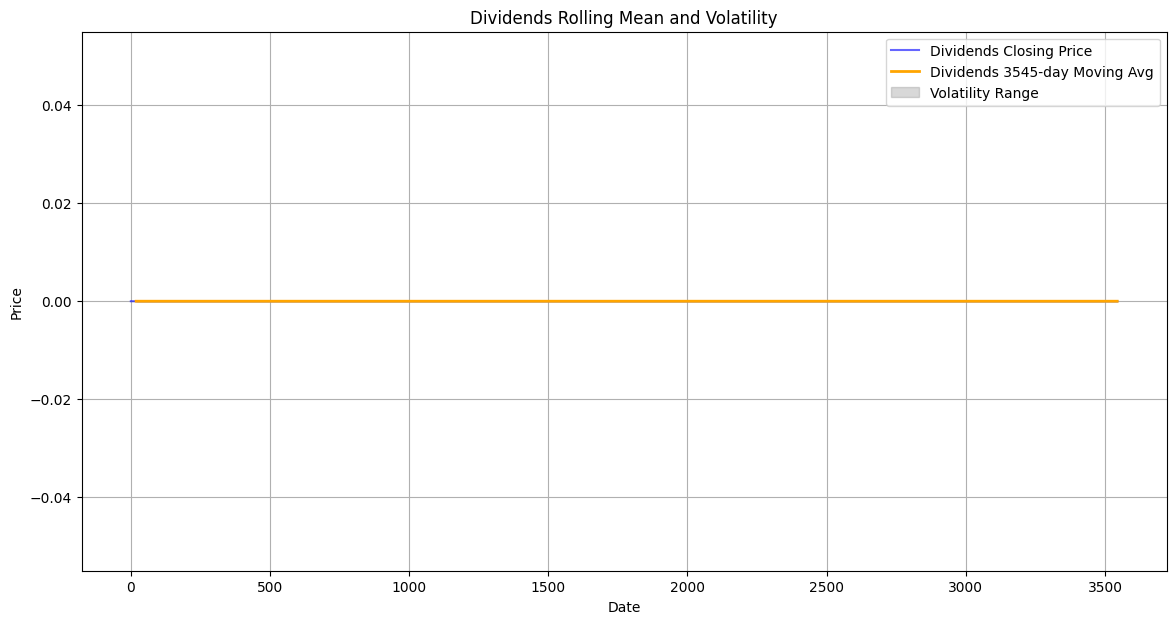

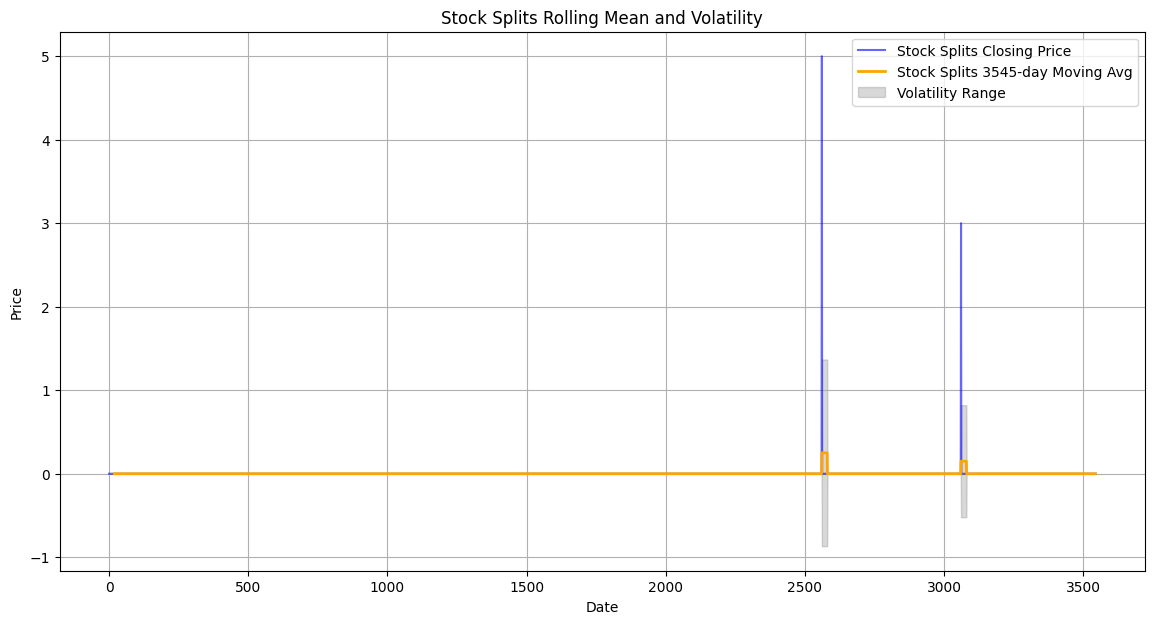

In [19]:
tickers = ["TSLA"]
window_size = 20  # Define rolling window (e.g., 20-day moving average)

# Select numeric columns (e.g., 'float', 'int')
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute rolling statistics for each numeric column (e.g., each stock ticker)
for ticker in numeric_data.columns:
    rolling_results = calculate_rolling_stats(numeric_data[ticker], window=window_size)
    plot_rolling_stats(numeric_data[ticker], rolling_results, ticker)

## Check Data Stationary

In [46]:
df=pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [47]:
from scripts.stationary import plot_time_series,adf_test,plot_rolling_statistics

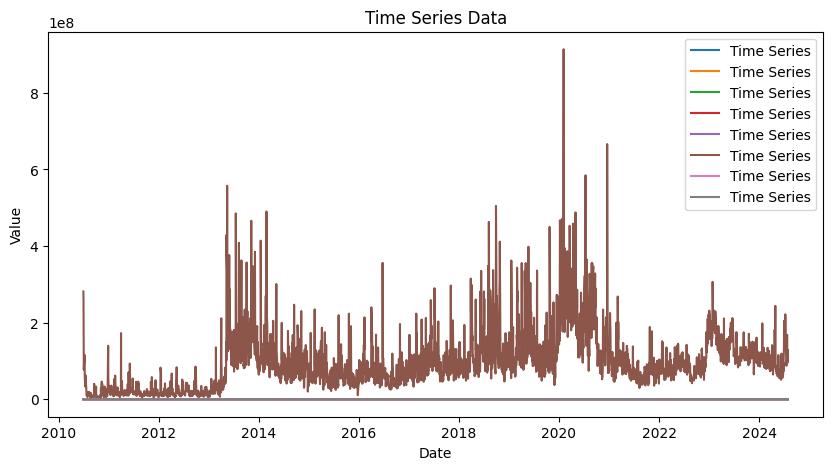

In [48]:
plot_time_series(df)

In [49]:
adf_test(df['Volume'])

ADF Test Results:
Test Statistic: -3.7316469903773744
P-Value: 0.003689401749011231
Critical Values: {'1%': np.float64(-3.432210699243541), '5%': np.float64(-2.8623621515791817), '10%': np.float64(-2.567207645348896)}
✅ The series is likely stationary (Reject H0).


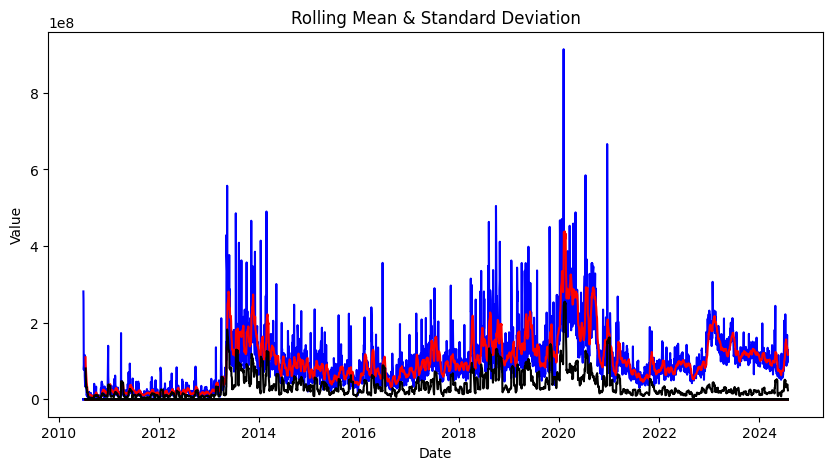

In [50]:
plot_rolling_statistics(df)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score,median_absolute_error,mean_squared_error

In [57]:
try:
    # Corrected code to match the actual column name
    df['Date']= pd.to_datetime(df['Date'])
    df = df.set_index('Date') #set the timestamp column as the index.
    df = df.asfreq('D')  # Resample to daily frequency
    print(df.head())

except KeyError as e:
    print(f"KeyError: {e}. Check your column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

KeyError: 'Date'. Check your column names.


In [58]:
# Split Data into Training and Testing Sets
X = df.drop(columns=['Volume'])  # Features
y =df['Volume']  # Target 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Scale the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [64]:
from statsmodels.tsa.arima.model import ARIMA
try:
    model = ARIMA(df['Volume'], order=(1, 1, 2))
    model_fit = model.fit()  # Remove disp=0
    print(model_fit.summary())

except Exception as e:
    print(f"An error occurred: {e}")

c:\Users\CBE\Desktop\week 11\project_week_11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\CBE\Desktop\week 11\project_week_11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\CBE\Desktop\week 11\project_week_11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 3545
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -67478.561
Date:                Tue, 04 Mar 2025   AIC                         134965.123
Time:                        12:02:51   BIC                         134989.815
Sample:                             0   HQIC                        134973.929
                               - 3545                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5329      0.022     24.091      0.000       0.490       0.576
ma.L1         -0.9606      0.022    -42.966      0.000      -1.004      -0.917
ma.L2          0.0205      0.019      1.098      0.2

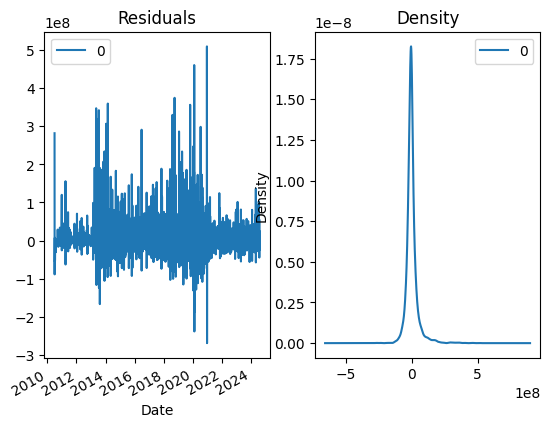

In [51]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()



c:\Users\CBE\Desktop\week 11\project_week_11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\CBE\Desktop\week 11\project_week_11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\CBE\Desktop\week 11\project_week_11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


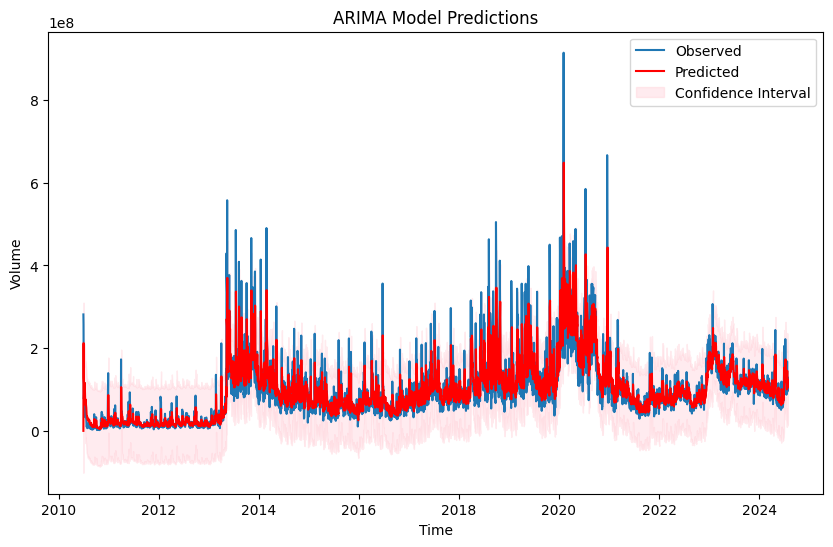

In [47]:
try:
    model = ARIMA(df['Volume'], order=(1, 1, 2))
    model_fit = model.fit()

    # Get predictions
    predictions = model_fit.get_prediction()
    predicted_values = predictions.predicted_mean
    confidence_intervals = predictions.conf_int()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Volume'], label='Observed')
    plt.plot(predicted_values, color='red', label='Predicted')
    plt.fill_between(
        confidence_intervals.index,
        confidence_intervals.iloc[:, 0],
        confidence_intervals.iloc[:, 1],
        color='pink',
        alpha=0.3,
        label='Confidence Interval',
    )
    plt.title('ARIMA Model Predictions')
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

# LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, r2_score,median_absolute_error,mean_squared_error

In [69]:
# Build the LSTM model
sequence_length = 10
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\CBE\Desktop\week 11\project_week_11\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 14339583688835072.0000
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14956371057311744.0000
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15365314220916736.0000
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15565357691437056.0000
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15513801977757696.0000
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15589019740012544.0000
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15466170790445056.0000
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14705890712092672.0000
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14556063999197184.0000
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14921447604486144.0000


In [71]:
# Predict on the test set
predictions = model.predict(X_test)
train_preds =  model.predict(X_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [72]:
print('R-Squared for Train set: %0.2f' % r2_score(y_true=y_train, y_pred=train_preds))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=y_test, y_pred=predictions))

R-Squared for Train set: -1.65
R-Squared for Test set: -1.16


In [ ]:
print('Median Absolute Error for Train set: %0.2f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Median Absolute Error for Test set: %0.2f' % median_absolute_error(y_true=y_test, y_pred=predictions)) 

Median Absolute Error for Train set: 82121027.09
Median Absolute Error for Test set: 84164627.08


In [ ]:
# Inverse transform to original scale
forecast = scaler.inverse_transform(predictions)